# Regularization

In [15]:
from sklearn.model_selection import cross_val_score, train_test_split


Let's improve our understanding of what impacted **Titanic** passengers' chance of survival
- We will use logistic classifiers which are easy to interpret
- Remember we already did it with statsmodels in lecture "Decision Science - Logistic Regression"
- We were using `p-values` & statistical assumptions to detect which features were irrelevant / don't generalize
- This time, we will use `regularization` to detect relevant/irrelevant features based on under/overfitting criteria
- **Our goal is to compare `L1` and `L2` penalties**

## 1. We load and preprocess the data for you

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_titanic_dataset_encoded.csv")

# the dataset is already one-hot-encoded
data.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,class_First,class_Third,who_child,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,0,0,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,1,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [3]:
# We build X and y

y = data["survived"]
X = data.drop(columns="survived")
X.head()

,pclass,age,sibsp,parch,fare,sex_female,class_First,class_Third,who_child,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,3,22.0,1,0,7.2500,0,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,0,1


In [4]:
# We MinMaxScale our features for you
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X.shape

(714, 12)

## 1.  Logistic Regression without regularization

❓ Rank the features by decreasing order of importance after training a simple **non-regularized** Logistic Regression (i.e. look at the coefficients after fitting)
- Careful: `LogisticRegression` is penalized by default
  - take a look at the [penalty parameter](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to find out how to remove the penalty)
- Increase `max_iter` to a larger number until model converges

In [38]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_scaled,y)

LogisticRegression()

In [39]:
cv_score = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')#.mean()
cv_score

array([-0.04421907,  0.36186613,  0.04279919,  0.0137931 ,  0.35878489])

In [40]:
coefficients = model.coef_
coefficients

array([[-0.71569364, -1.51653932, -1.5619015 , -0.53957813,  0.48245932,
         2.48240151,  0.64899006, -0.7862305 ,  1.126462  ,  0.26032963,
        -0.35413556, -0.1161553 ]])

In [41]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

"""penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
Specify the norm of the penalty:

None: no penalty is added;

'l2': add a L2 penalty term and it is the default choice;


'l1': add a L1 penalty term;

'elasticnet': both L1 and L2 penalty terms are added."""

In [46]:
model = LogisticRegression(penalty=None,max_iter= 100)
model.fit(X_scaled,y)

LogisticRegression(penalty=None)

In [47]:
coefficients = model.coef_
coefficients

array([[  2.54718746,  -2.19615136,  -2.47713147,  -0.8938204 ,
          1.35881167,   2.67188264,   2.36041729,  -2.4568912 ,
          1.33635641, -11.22167092, -11.91872516, -11.52312564]])

<AxesSubplot:ylabel='Feature'>

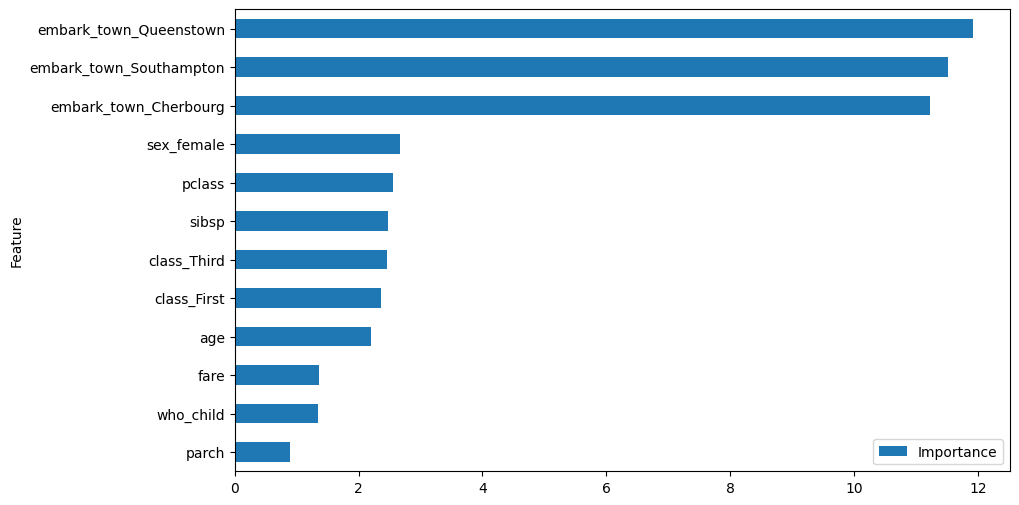

In [48]:
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X_scaled.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

❓How do you interpret, in plain English, the value for the coefficient `sex_female`?

<details>
    <summary>Answer</summary>

> "All other things being equal (such as age, ticket class etc...),
being a women increases your log-odds of survival by 2.67 (your coef value)"
    
> "Controling for all other explaining factors available in this dataset,
being a women increases your odds of survival by exp(2.67) = 14"

</details>


if you are a woman you have better chance to survive

❓ What is the feature that most impacts the chances of survival according to your model?  
Fill the `top_1_feature` list below with the name of this feature

In [49]:
feature_importance

,Feature,Importance
3,parch,0.893820
8,who_child,1.336356
4,fare,1.358812
1,age,2.196151
6,class_First,2.360417
7,class_Third,2.456891
2,sibsp,2.477131
0,pclass,2.547187
5,sex_female,2.671883
9,embark_town_Cherbourg,11.221671


In [31]:
top_1_feature = ["embark_town_Queenstown" ]

In [32]:
from nbresult import ChallengeResult
result = ChallengeResult('unregularized', top_1_feature = top_1_feature)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/katebulaeva/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/katebulaeva/code/katebulaeva/05-ML/05-Model-Tuning/data-regularization/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_unregularized.py::TestUnregularized::test_top_1 PASSED              [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/unregularized.pickle

git commit -m 'Completed unregularized step'

git push origin master



In [33]:
!git add tests/unregularized.pickle

!git commit -m 'Completed unregularized step'

!git push origin master

[master 446a425] Completed unregularized step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/unregularized.pickle
Enumerating objects: 15, done.
Counting objects: 100% (15/15), done.
Delta compression using up to 10 threads
Compressing objects: 100% (14/14), done.
Writing objects: 100% (15/15), 4.21 KiB | 4.21 MiB/s, done.
Total 15 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), done.
To github.com:katebulaeva/data-regularization.git
 * [new branch]      master -> master


## 2.  Logistic Regression with an L2 penalty

Let's use a **Logistic model** whose log-loss has been penalized with a **L2** term to figure out the **most important features** without overfitting.  
This is the "classification" equivalent to the "Ridge" regressor

❓ Instantiate a **strongly regularized** `LogisticRegression` and rank its features by importance (look at the coefficients)
- By "strongly regularized" we mean "more than Sklearn's default regularization factor". 
- Sklearn's default values are very useful orders of magnitudes to keep in mind for "scaled features"

In [70]:
model = LogisticRegression(penalty='l2',max_iter= 100, C =0.1)
model.fit(X_scaled,y)
coefficients = model.coef_
coefficients

array([[-0.53922754, -0.47771966, -0.34087207, -0.0539056 ,  0.1367902 ,
         1.80860018,  0.44148647, -0.63693165,  0.60280938,  0.25295572,
        -0.13244337, -0.15440266]])

In [78]:
""" C = 1/alpha  """

'''Cfloat, default=1.0
Inverse of regularization strength; 
must be a positive float. 
Like in support vector machines, smaller values specify stronger regularization.'''

model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [72]:
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X_scaled.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

In [73]:
# YOUR CODE HERE
feature_importance


,Feature,Importance
3,parch,0.053906
10,embark_town_Queenstown,0.132443
4,fare,0.136790
11,embark_town_Southampton,0.154403
9,embark_town_Cherbourg,0.252956
2,sibsp,0.340872
6,class_First,0.441486
1,age,0.477720
0,pclass,0.539228
8,who_child,0.602809


❓ What are the top 2 features driving chances of survival according to your model?  
Fill the `top_2_features` list below with the name of these features

In [74]:
top_2_features = ["sex_female", "class_Third"]

#### 🧪 Test your code below

In [75]:
from nbresult import ChallengeResult
result = ChallengeResult('ridge', top_2 = top_2_features)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/katebulaeva/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/katebulaeva/code/katebulaeva/05-ML/05-Model-Tuning/data-regularization/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_ridge.py::TestRidge::test_top2 PASSED                               [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/ridge.pickle

git commit -m 'Completed ridge step'

git push origin master



In [76]:
!git add tests/ridge.pickle

!git commit -m 'Completed ridge step'

!git push origin master

[master a1704a3] Completed ridge step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/ridge.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 10 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 442 bytes | 442.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:katebulaeva/data-regularization.git
   446a425..a1704a3  master -> master


## 2. Logistic Regression with an L1 penalty

This time, we'll use a logistic model whose log-loss has been penalized with a **L1** term to **filter-out the less important features**.  
This is the "classification" equivalent to the **Lasso** regressor

❓ Instantiate a **strongly regularized** `LogisticRegression` and rank its features by importance

In [83]:
# YOUR CODE HERE

"""Warning The choice of the algorithm depends on the penalty chosen. Supported penalties by solver:
‘lbfgs’ - [‘l2’, None]
‘liblinear’ - [‘l1’, ‘l2’]
‘newton-cg’ - [‘l2’, None]
‘newton-cholesky’ - [‘l2’, None]
‘sag’ - [‘l2’, None]
‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]"""

model = LogisticRegression(penalty='l1',max_iter= 100, C =0.1, solver='liblinear')

model.fit(X_scaled,y)
coefficients = model.coef_

In [84]:
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X_scaled.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance

,Feature,Importance
2,sibsp,0.000000
3,parch,0.000000
4,fare,0.000000
6,class_First,0.000000
9,embark_town_Cherbourg,0.000000
10,embark_town_Queenstown,0.000000
1,age,0.062921
7,class_Third,0.144723
11,embark_town_Southampton,0.239404
8,who_child,0.255844


❓ What are the features that have absolutely no impact on chances of survival, according to your L1 model?  
Fill the `zero_impact_features` list below with the name of these features; you may have to add elements to the list.

- Do you notice how some of them were "highly important" according to the non-regularized model? 
- From now on, we will always regularize our linear models!

In [ ]:
zero_impact_features = ["sibsp", "parch", "fare", "class_First", 'embark_town_Cherbourg',]

#### 🧪 Test your code below

In [ ]:
from nbresult import ChallengeResult
result = ChallengeResult('lasso', zero_impact_features = zero_impact_features)
result.write()
print(result.check())

**🏁 Congratulation! Don't forget to commit and push your notebook**